In [1]:
# Model design
import agentpy as ap

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython

In [6]:
class CarModel(ap.Agent):

    def setup(self):
        # Initialize an attribute with a parameter
        n_cars = int(self.p['Number of Cars'] * (self.p.size**2))
        cars = self.agents = ap.AgentList(self, n_cars)
        
        #Creates grid (roads)
        self.roads = ap.Grid(self, [self.p.size]*2, track_empty=True)      
        self.roads.add_agents(roads, random=True, empty=True)
        
        #dynamic variable
        #0 = static, 1 = driving
        self.agents.condition = 0

    def step(self):
        #select static cars
        static_cars = self.agents.select(self.agents.condition == 1)
        
        #drive
        for car in static_cars:
            for neighbor in self.roads.neighbors(cars):
                if neighbor.condition == 1:
                       neighbor.condition = 1
                else:
                       neighbor.condition = 0 
            car.condition = 0
        
        if len(static_cars) == 0:
            self.stop()
                                                 

In [7]:
# Define parameters

parameters = {
    'Number of Cars': 0.2, # Percentage of grid covered by trees
    'size': 50, # Height and length of the grid
    'steps': 100,
}

AttributeError: 'dict' object has no attribute '_new_id'

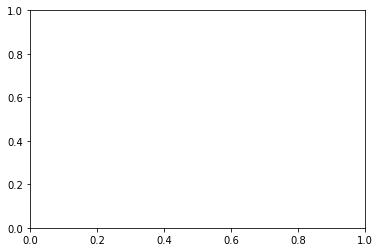

In [9]:
# Create single-run animation with custom colors

def animation_plot(model, ax):
    attr_grid = model.roads.attr_grid('condition')
    color_dict = {0:'#7FC97F', 1:'#d62c2c', None:'#d5e5d5'}
    ap.gridplot(attr_grid, ax=ax, color_dict=color_dict, convert=True)
    ax.set_title(f"Simulation of a forest fire\n"
                 f"Time-step: {model.t}, Trees left: "
                 f"{len(model.agents.select(model.agents.condition == 0))}")

fig, ax = plt.subplots() 
model = CarModel(parameters)
animation = ap.animate(model, fig, ax, animation_plot)
IPython.display.HTML(animation.to_jshtml(fps=15))